In [1]:
import os
import numpy as np
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
# import camb
# from camb import model
# from jupyterthemes import jtplot
import math
import time
import h5py
import sys 
moments_path = os.path.realpath(os.path.join('/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/Moments_analysis/'))
sys.path.insert(0, moments_path)
import h5py as h5
import healpy as hp
import pickle
import copy
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol = 2)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')

# jtplot.reset()
from tqdm import tqdm




In [1]:
import get_unique_comb_kp2_kp3 as get_unique_ind

sdir = '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/saveDVs/'

sm_all = [8.2,13.1,21.0,33.6,54.,86.,138,221.]

nsm_all = len(sm_all)
nzbin_all = 4

_, id_kp2_unique, _, id_kp3_unique = get_unique_ind.save_unique_combs(nsm_all, nzbin_all)
jr_lhs = 0
nsamp_lhs = 20000

kp2_all_lhs = []
kp3_all_lhs = []

id_kp2_all_finite_lhs = []
id_kp3_all_finite_lhs = []

for jl in tqdm(range(nsamp_lhs)):
    fname = sdir + 'OmAsnarrow/' + 'lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '/kappa_all_jlhs' + str(jl)
    df_kappa_all = load_obj(fname)
    kappa2_all = df_kappa_all['kp2']
    kappa3_all = df_kappa_all['kp3']

    kp2_all = []
    id_kp2_all_finite = []
    for jid_kp2 in range(len(id_kp2_unique)):
        jz1, jz2, i, j = id_kp2_unique[jid_kp2]
        kp2_jid = kappa2_all[jz1, jz2, i, j]
        # if np.all(np.isfinite(kp2_jid)):
        kp2_all.append(kp2_jid)
        id_kp2_all_finite.append([jz1, jz2, i, j])
        
    kp2_all = np.array(kp2_all)
    # id_kp2_all_finite = np.array(id_kp2_all_finite)
    
    kp3_all = []
    id_kp3_all_finite = []
    for jid_kp3 in range(len(id_kp3_unique)):
        jz1, jz2, jz3, i, j, k = id_kp3_unique[jid_kp3]
        kp3_jid = kappa3_all[jz1, jz2, jz3, i, j, k]
        # if np.all(np.isfinite(kp3_jid)):
        kp3_all.append(kp3_jid)
        id_kp3_all_finite.append([jz1, jz2, jz3, i, j, k])
    kp3_all = np.array(kp3_all)
    # id_kp3_all_finite = np.array(id_kp3_all_finite)
    
    if np.all(np.isfinite(kp2_all)) and np.all(np.isfinite(kp3_all)):
        kp2_all_lhs.append(kp2_all)
        kp3_all_lhs.append(kp3_all)
        id_kp2_all_finite_lhs.append(id_kp2_all_finite)
        id_kp3_all_finite_lhs.append(id_kp3_all_finite)
    

    
    


  0%|          | 33/20000 [01:50<18:34:58,  3.35s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-a0c145eb9740>", line 22, in <module>
    df_kappa_all = load_obj(fname)
  File "<ipython-input-1-5115aeda3819>", line 25, in load_obj
    return pickle.load(f)#, encoding='latin1')
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-package

TypeError: object of type 'NoneType' has no len()

In [4]:
kp2_all_lhs = np.vstack(kp2_all_lhs)
kp3_all_lhs = np.vstack(kp3_all_lhs)

saved = {'kp2_all_lhs':kp2_all_lhs, 'kp3_all_lhs':kp3_all_lhs, 'id_kp2_all_finite':np.dstack(id_kp2_all_finite_lhs).T,
        'id_kp3_all_finite':np.dstack(id_kp3_all_finite_lhs).T, 'sm_all':sm_all}

fname = sdir + 'OmAsnarrow/' + 'COMBINED_lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '.pk'
# np.save(fname, saved, allow_pickle=True)
hf = h5py.File(fname, 'w')
hf.create_dataset('kp2_all_lhs', data=saved['kp2_all_lhs'])
hf.create_dataset('kp3_all_lhs', data=saved['kp3_all_lhs'])
hf.create_dataset('id_kp2_all_finite', data=saved['id_kp2_all_finite'])
hf.create_dataset('id_kp3_all_finite', data=saved['id_kp3_all_finite'])
hf.create_dataset('sm_all', data=sm_all)
hf.close()




In [5]:
def filter_full_data(data_full, params):
    filter_type = params['type']
    
    sm_all = data_full['sm_all']
    id_kp2_all_finite = data_full['id_kp2_all_finite'][0,:,:].T
    ind_filter_kp2 = []
    for jid in range(len(id_kp2_all_finite)):
        jz1, jz2, i, j = id_kp2_all_finite[jid]
        
        if filter_type == 'auto_zbin':
            if jz1 == jz2:
                ind_filter_kp2.append(jid)
                
        if filter_type == 'simple_test':
            if (jz1 == jz2) and (jz2==3) and (i==j):
                ind_filter_kp2.append(jid)
                

        if filter_type == 'auto_smbin':
            if i == j:
                ind_filter_kp2.append(jid)

        if filter_type == 'auto_zbin_gtsc':
            sc_all = params['sc_all']
            if jz1 == jz2:
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max):                
                    ind_filter_kp2.append(jid)

        if filter_type == 'auto_smbin_gtsc':
            sc_all = params['sc_all']            
            if i == j:
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max):                
                    ind_filter_kp2.append(jid)

        if filter_type == 'all_gtsc':
            sc_all = params['sc_all']    
            sc_jz_all = np.array([sc_all[jz1], sc_all[jz2]])
            sc_jz_max = np.amax(sc_jz_all)
            # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]):
            if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max):
                ind_filter_kp2.append(jid)
                
        if filter_type == 'all':
            ind_filter_kp2.append(jid)
        
    ind_filter_kp2 = np.array(ind_filter_kp2)
    data_kp2_lhs_filter = data_full['kp2_all_lhs'][:, ind_filter_kp2]

    id_kp3_all_finite = data_full['id_kp3_all_finite'][0,:,:].T
    ind_filter_kp3 = []
    for jid in range(len(id_kp3_all_finite)):
        jz1, jz2, jz3, i, j, k = id_kp3_all_finite[jid]
        if filter_type == 'auto_zbin':
            if (jz1 == jz2) and (jz2 == jz3):
                ind_filter_kp3.append(jid)
                
        if filter_type == 'simple_test':
            if (jz1 == jz2) and (jz2==jz3) and (jz2==3) and (i==j) and (j==k):
                ind_filter_kp3.append(jid)
                

        if filter_type == 'auto_smbin':
            if (i == j) and (j == k):
                ind_filter_kp3.append(jid)

        if filter_type == 'auto_zbin_gtsc':
            sc_all = params['sc_all']
            if (jz1 == jz2) and (jz2 == jz3):
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2], sc_all[jz3]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]) & (sm_all[k] > sc_all[jz3]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max) & (sm_all[k] > sc_jz_max):                    
                    ind_filter_kp3.append(jid)

        if filter_type == 'auto_smbin_gtsc':
            sc_all = params['sc_all']            
            if (i == j) and (j == k):
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2], sc_all[jz3]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]) & (sm_all[k] > sc_all[jz3]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max) & (sm_all[k] > sc_jz_max):                    
                    ind_filter_kp3.append(jid)

        if filter_type == 'all_gtsc':
            sc_all = params['sc_all']         
            sc_jz_all = np.array([sc_all[jz1], sc_all[jz2], sc_all[jz3]])
            sc_jz_max = np.amax(sc_jz_all)
            # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]) & (sm_all[k] > sc_all[jz3]):
            if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max) & (sm_all[k] > sc_jz_max):                    
                ind_filter_kp3.append(jid)
                
        if filter_type == 'all':
            ind_filter_kp3.append(jid)
        
    ind_filter_kp3 = np.array(ind_filter_kp3)
    data_kp3_lhs_filter = data_full['kp3_all_lhs'][:, ind_filter_kp3]

    return data_kp2_lhs_filter, data_kp3_lhs_filter, ind_filter_kp2, ind_filter_kp3
    



In [6]:
jr_lhs = 0
nsamp_lhs = 10000
sdir = '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/saveDVs/'
# data_full = pk.load(open(sdir + 'newIA/' + 'COMBINED_lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '.pk','rb'))
fname = sdir + 'OmAsonly/' + 'COMBINED_lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '.pk'
# np.save(fname, saved, allow_pickle=True)
import h5py
hf = h5py.File(fname, 'r')




In [7]:
data_full = {'kp2_all_lhs':hf['kp2_all_lhs'], 'kp3_all_lhs':hf['kp3_all_lhs'], 
         'id_kp2_all_finite':hf['id_kp2_all_finite'],
        'id_kp3_all_finite':hf['id_kp3_all_finite'],
         'sm_all':hf['sm_all']
        }




In [284]:
sc_all = [45.0, 28.0, 18.0, 18.0]

# params_filter = {'type':'auto_smbin_gtsc', 'sc_all':sc_all}
# params_filter = {'type':'all_gtsc', 'sc_all':sc_all}
params_filter = {'type':'all', 'sc_all':sc_all}
# params_filter = {'type':'simple_test', 'sc_all':sc_all}
norm_with_mean = True 
# var_th = 0.9999999
var_th = 60
do_whiten = True
# params_filter = {'type':'simple_test'}
kp2_all_lhs, kp3_all_lhs, ind_filter_kp2, ind_filter_kp3 = filter_full_data(data_full, params_filter)
ind_filter_kp2_kp3 = np.concatenate((ind_filter_kp2, hf['kp2_all_lhs'].shape[1] + ind_filter_kp3))
kp2_kp3_all_lhs = np.hstack((kp2_all_lhs, kp3_all_lhs))






In [285]:
kp2_all_lhs.shape, kp3_all_lhs.shape




((9636, 360), (9636, 2400))

In [286]:
nsim2, ncomp2 = kp2_all_lhs.shape[0], kp2_all_lhs.shape[1] 
nsim3, ncomp3 = kp3_all_lhs.shape[0], kp3_all_lhs.shape[1] 
nsim23, ncomp23 = kp2_kp3_all_lhs.shape[0], kp2_kp3_all_lhs.shape[1] 




In [287]:
df = pk.load(open('/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/fid_sim_measurements.pk','rb'))  

# saved = {'kp2_all_fid':kp2_all_fid, 'kp3_all_fid':kp3_all_fid, 'kp3_all_data':kp3_all_data, 'kp2_all_data':kp2_all_data}
kp2_all_fid = df['kp2_all_fid']
kp3_all_fid = df['kp3_all_fid']
kp3_all_data = df['kp3_all_data']
kp2_all_data = df['kp2_all_data']
kp2_kp3_all_data = np.hstack((kp2_all_data, kp3_all_data))
kp2_kp3_all_fid = np.concatenate((kp2_all_fid, kp3_all_fid))




In [288]:
mean_kp2sims = np.mean(kp2_all_data.T, axis=1)
mean_kp3sims = np.mean(kp3_all_data.T, axis=1)
mean_kp2kp3sims_pca = np.mean(kp2_kp3_all_data.T, axis=1)



In [289]:
# mean_kp2sims


In [290]:
# # kp2_kp3_all_fid.shape
# # np.mean(np.mean(kp3_all_data, axis=0)/kp3_all_fid)
# # np.mean(np.min(kp3_all_lhs, axis=0)/kp3_all_fid)
# # ind_filter_kp2
# # (data_full['id_kp2_all_finite'][0,:,:].T)[ind_filter_kp2,:]
# pl.figure()
# indrandsel = np.random.randint(0,kp3_all_lhs.shape[0],400) 
# for ji in range(len(indrandsel)):
#     pl.plot(kp3_all_lhs[indrandsel[ji],:]/kp3_all_fid, alpha=0.1)

# pl.yscale('log')
# pl.ylim(0.01,100)
# pl.axhline(1.0, ls='--', lw=2)
# pl.show()




In [291]:
# indrandsel



In [292]:
# do_div_fid = False
# if do_div_fid:
#     kp2_all_fid_mat = np.tile(kp2_all_fid[ind_filter_kp2].reshape(1, ncomp2), (nsim2, 1))
#     kp3_all_fid_mat = np.tile(kp3_all_fid[ind_filter_kp3].reshape(1, ncomp3), (nsim3, 1))
# else:
#     kp2_all_fid_mat = np.tile(np.ones_like(ind_filter_kp2).reshape(1, ncomp2), (nsim2, 1))
#     kp3_all_fid_mat = np.tile(np.ones_like(ind_filter_kp3).reshape(1, ncomp3), (nsim3, 1))
    


In [293]:
from sklearn.preprocessing import StandardScaler
scaler_kp2 = StandardScaler(with_mean=norm_with_mean)
scaler_kp2.fit(kp2_all_lhs)
kp2_all_lhs_normalised = scaler_kp2.transform(kp2_all_lhs)
# scaler_kp2.fit(kp2_all_lhs/kp2_all_fid_mat)
# kp2_all_lhs_normalised = scaler_kp2.transform(kp2_all_lhs/kp2_all_fid_mat)
# kp2_all_lhs_normalised = (kp2_all_lhs/kp2_all_fid_mat)/scaler_kp2.scale_


scaler_kp3 = StandardScaler(with_mean=norm_with_mean)
scaler_kp3.fit(kp3_all_lhs)
kp3_all_lhs_normalised = scaler_kp3.transform(kp3_all_lhs)
# scaler_kp3.fit(kp3_all_lhs/kp3_all_fid_mat)
# kp3_all_lhs_normalised = (kp3_all_lhs/kp3_all_fid_mat)/scaler_kp3.scale_

scaler_kp2_kp3 = StandardScaler(with_mean=norm_with_mean)
scaler_kp2_kp3.fit(kp2_kp3_all_lhs)
kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)




In [294]:
# np.mean(kp2_all_lhs_normalised,axis=0)
# scaler_kp3.mean_


In [295]:
# # scaler_kp2_kp3 = StandardScaler().fit(kp2_kp3_all_lhs)
# # kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)
# pl.figure()
# for ji in range(kp2_all_lhs_normalised.shape[0]):
#     pl.plot(kp2_all_lhs_normalised[ji,:], color='k', alpha=0.2)



In [296]:

from sklearn.decomposition import PCA
pca_kp2 = PCA(n_components=var_th,whiten=do_whiten)
pca_kp2.fit(kp2_all_lhs_normalised)
kp2_all_lhs_normalised_pcaonly = pca_kp2.transform(kp2_all_lhs_normalised)
# cov_mat_kp2_pca = np.cov(kp2_all_lhs_normalised_pcaonly.T)
print(pca_kp2.explained_variance_ratio_, (pca_kp2.components_).shape)



[9.93399219e-01 5.99289659e-03 5.37529831e-04 6.34833646e-05
 5.73418443e-06 8.78366176e-07 2.05230276e-07 4.14672061e-08
 7.20549685e-09 2.41093806e-09 1.19667549e-09 5.73971327e-10
 1.58418115e-10 8.02311241e-11 5.62454322e-11 4.72283736e-11
 2.43669362e-11 1.51578706e-11 8.02225066e-12 2.74860906e-12
 2.56834387e-12 1.67761432e-12 6.12238799e-13 3.65009048e-13
 2.41325423e-13 1.66989424e-13 5.65878287e-14 4.62204179e-14
 3.36634829e-14 2.36510219e-14 1.68179468e-14 1.29297214e-14
 9.71196134e-15 6.52421676e-15 4.89110590e-15 3.25909633e-15
 2.21695715e-15 1.54260818e-15 1.39967640e-15 8.11288548e-16
 6.96810906e-16 3.76131700e-16 3.34031712e-16 2.48999086e-16
 1.96915853e-16 1.30826324e-16 8.66416494e-17 7.77596266e-17
 6.66530977e-17 5.01811965e-17 4.54001507e-17 2.92931635e-17
 2.44343939e-17 1.55192920e-17 1.38458400e-17 1.08797230e-17
 8.14348511e-18 6.51240097e-18 5.25673841e-18 4.72473680e-18] (60, 360)


In [297]:
# print(pca_kp2.explained_variance_ratio_, (pca_kp2.components_).shape)



In [298]:
from sklearn.decomposition import PCA
pca_kp3 = PCA(n_components=var_th,whiten=do_whiten)
pca_kp3.fit(kp3_all_lhs_normalised)
kp3_all_lhs_normalised_pcaonly = pca_kp3.transform(kp3_all_lhs_normalised)
# cov_mat_kp3_pca = np.cov(kp3_all_lhs_normalised_pcaonly.T)
print(pca_kp3.explained_variance_ratio_, (pca_kp3.components_).shape)



[9.95561875e-01 2.83099495e-03 1.14662401e-03 4.38069401e-04
 1.49264245e-05 4.73859123e-06 1.74993576e-06 6.45607302e-07
 1.40037902e-07 1.09863656e-07 4.40652538e-08 2.72220369e-08
 2.06557580e-08 1.19910324e-08 9.13885430e-09 3.21967720e-09
 2.43740606e-09 2.03982236e-09 1.59299086e-09 8.51338763e-10
 7.06436514e-10 4.95553081e-10 4.07625015e-10 2.37315189e-10
 1.77668199e-10 1.28295202e-10 1.00346002e-10 8.93452524e-11
 6.40886982e-11 3.80568183e-11 2.97709949e-11 2.18790553e-11
 1.98491538e-11 1.31161197e-11 1.20381627e-11 8.25977047e-12
 6.35317678e-12 4.95279094e-12 4.07571235e-12 3.69161502e-12
 2.84651005e-12 1.74105969e-12 1.35982962e-12 1.12398502e-12
 9.47804033e-13 8.25476622e-13 7.82318398e-13 6.20346212e-13
 4.92201478e-13 3.76415105e-13 3.46813815e-13 3.18186548e-13
 2.46694971e-13 2.15089403e-13 1.62634016e-13 1.47773318e-13
 1.27311979e-13 1.19120722e-13 9.15122269e-14 7.97733982e-14] (60, 2400)


In [299]:
from sklearn.decomposition import PCA
pca_kp2_kp3 = PCA(n_components=var_th,whiten=do_whiten)
pca_kp2_kp3.fit(kp2_kp3_all_lhs_normalised)
kp2_kp3_all_lhs_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_all_lhs_normalised)
# cov_mat_kp3_pca = np.cov(kp3_all_lhs_normalised_pcaonly.T)
print(pca_kp2_kp3.explained_variance_ratio_, (pca_kp2_kp3.components_).shape)




[9.85113827e-01 1.19289567e-02 2.31530958e-03 4.49363732e-04
 1.51208580e-04 2.63766910e-05 1.04966863e-05 2.28431131e-06
 1.01514417e-06 6.12483583e-07 2.79889032e-07 1.11670532e-07
 5.35937858e-08 3.81442419e-08 2.28119985e-08 1.37247270e-08
 9.16346795e-09 7.06911108e-09 3.52839940e-09 2.51018972e-09
 1.91573121e-09 1.20768411e-09 1.05603438e-09 6.77371406e-10
 4.74456624e-10 3.84787645e-10 2.41115778e-10 2.07588797e-10
 1.69167221e-10 1.46735743e-10 1.27344752e-10 9.03025153e-11
 7.34825461e-11 5.68817611e-11 2.61133050e-11 2.17152903e-11
 1.67685026e-11 1.54745940e-11 1.44690546e-11 1.02834134e-11
 7.67799046e-12 5.77717468e-12 4.85508730e-12 4.48342719e-12
 3.69241000e-12 3.27773288e-12 2.57400268e-12 2.14631850e-12
 2.07264809e-12 1.51859262e-12 1.35770743e-12 9.27832740e-13
 8.52114835e-13 7.43186214e-13 6.27887410e-13 5.04417299e-13
 4.62567896e-13 3.71330265e-13 3.25830264e-13 2.74030498e-13] (60, 2760)


In [300]:
# from sklearn.decomposition import PCA
# pca_kp2_kp3 = PCA(n_components=var_th,whiten=do_whiten)
# pca_kp2_kp3.fit(kp2_kp3_all_lhs_normalised)
# kp2_kp3_all_lhs_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_all_lhs_normalised)
# # cov_mat_kp2_kp3_pca = np.cov(kp2_kp3_all_lhs_normalised_pcaonly.T)






In [301]:
# nsim2_data, nsim3_data = kp2_all_data.shape[0], kp3_all_data.shape[0]
# if do_div_fid:
#     kp2_all_fid_mat2 = np.tile(kp2_all_fid[ind_filter_kp2].reshape(1, ncomp2), (nsim2_data, 1))
#     kp3_all_fid_mat2 = np.tile(kp3_all_fid[ind_filter_kp3].reshape(1, ncomp3), (nsim3_data, 1))
# else:
#     kp2_all_fid_mat2 = np.tile(np.ones_like(ind_filter_kp2).reshape(1, ncomp2), (nsim2_data, 1))
#     kp3_all_fid_mat2 = np.tile(np.ones_like(ind_filter_kp3).reshape(1, ncomp3), (nsim3_data, 1))
    




In [302]:
kp2_all_data_normalised = scaler_kp2.transform(kp2_all_data[:,ind_filter_kp2])
kp3_all_data_normalised = scaler_kp3.transform(kp3_all_data[:,ind_filter_kp3])
kp2_kp3_all_data_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_data[:,ind_filter_kp2_kp3])


# kp2_all_data_normalised = scaler_kp2.transform(kp2_all_data[:,ind_filter_kp2]/kp2_all_fid_mat2)
# kp3_all_data_normalised = scaler_kp3.transform(kp3_all_data[:,ind_filter_kp3]/kp3_all_fid_mat2)

# kp2_all_data_normalised = (kp2_all_data[:,ind_filter_kp2]/kp2_all_fid_mat2)/scaler_kp2.scale_
# kp3_all_data_normalised = (kp3_all_data[:,ind_filter_kp3]/kp3_all_fid_mat2)/scaler_kp3.scale_



In [303]:
# scaler_kp2.mean_, scaler_kp2.scale_
# kp2_all_data[:,ind_filter_kp2]/kp2_all_fid_mat2


In [304]:
kp2_fid_normalised = scaler_kp2.transform(np.array([kp2_all_fid[ind_filter_kp2]]))
kp3_fid_normalised = scaler_kp3.transform(np.array([kp3_all_fid[ind_filter_kp3]]))
kp2_kp3_fid_normalised = scaler_kp2_kp3.transform(np.array([kp2_kp3_all_fid[ind_filter_kp2_kp3]]))

# kp2_fid_normalised = scaler_kp2.transform(np.array([kp2_all_fid[ind_filter_kp2]/kp2_all_fid[ind_filter_kp2]]))
# kp3_fid_normalised = scaler_kp3.transform(np.array([kp3_all_fid[ind_filter_kp3]/kp3_all_fid[ind_filter_kp3]]))

# kp2_fid_normalised = (np.array([kp2_all_fid[ind_filter_kp2]]))/scaler_kp2.scale_
# kp3_fid_normalised = (np.array([kp3_all_fid[ind_filter_kp3]]))/scaler_kp3.scale_




In [305]:
kp2_sim_mean_normalised = scaler_kp2.transform(np.array([mean_kp2sims[ind_filter_kp2]]))
kp3_sim_mean_normalised = scaler_kp3.transform(np.array([mean_kp3sims[ind_filter_kp3]]))
kp2_kp3_sim_mean_normalised = scaler_kp2_kp3.transform(np.array([mean_kp2kp3sims_pca[ind_filter_kp2_kp3]]))




In [306]:
kp2_zeros_normalised = scaler_kp2.transform(np.array([np.zeros_like(ind_filter_kp2)]))
kp3_zeros_normalised = scaler_kp3.transform(np.array([np.zeros_like(ind_filter_kp3)]))
kp2_kp3_zeros_normalised = scaler_kp2_kp3.transform(np.array([np.zeros_like(ind_filter_kp2_kp3)]))




In [307]:
# 2+2



In [308]:
kp2_all_data_normalised_pcaonly = pca_kp2.transform(kp2_all_data_normalised)
kp3_all_data_normalised_pcaonly = pca_kp3.transform(kp3_all_data_normalised)
kp2_kp3_all_data_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_all_data_normalised)


In [309]:
# kp2_fid_normalised_pcaonly = pca_kp2.transform(kp2_fid_normalised)
# kp3_fid_normalised_pcaonly = pca_kp3.transform(kp3_fid_normalised)



In [310]:
kp2_fid_normalised_pcaonly = pca_kp2.transform(kp2_fid_normalised)
kp3_fid_normalised_pcaonly = pca_kp3.transform(kp3_fid_normalised)
kp2_kp3_fid_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_fid_normalised)



In [311]:
kp2_sim_mean_normalised_pcaonly = pca_kp2.transform(kp2_sim_mean_normalised)
kp3_sim_mean_normalised_pcaonly = pca_kp3.transform(kp3_sim_mean_normalised)
kp2_kp3_sim_mean_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_sim_mean_normalised)



In [312]:
kp2_zeros_normalised_pcaonly = pca_kp2.transform(kp2_zeros_normalised)
kp3_zeros_normalised_pcaonly = pca_kp3.transform(kp3_zeros_normalised)
kp2_kp3_zeros_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_zeros_normalised)



In [313]:
mean_kp2sims_pca = np.mean(kp2_all_data_normalised_pcaonly.T, axis=1)
mean_kp3sims_pca = np.mean(kp3_all_data_normalised_pcaonly.T, axis=1)
mean_kp2kp3sims_pca = np.mean(kp2_kp3_all_data_normalised_pcaonly.T, axis=1)



cov_mat_kp2sims_pca = np.cov(kp2_all_data_normalised_pcaonly.T)
cov_mat_kp3sims_pca = np.cov(kp3_all_data_normalised_pcaonly.T)
cov_mat_kp2kp3sims_pca = np.cov(kp2_kp3_all_data_normalised_pcaonly.T)






In [314]:
# %pip install scipy --upgrade
# ind_filter_kp3
(mean_kp2sims_pca - kp2_sim_mean_normalised_pcaonly)/kp2_sim_mean_normalised_pcaonly


array([[-6.03636057e-16, -7.68313323e-16, -1.71316528e-16,
        -3.34979490e-15,  3.88132553e-14,  1.03153516e-14,
         9.39363813e-15,  3.03737954e-14, -1.40933383e-15,
        -6.37543377e-14,  8.87333644e-14,  5.11857307e-15,
         2.56343964e-14, -6.19018464e-13,  5.67097606e-15,
         3.03108834e-13, -4.79950111e-14, -5.93357279e-14,
         1.15380003e-13, -2.66282153e-15,  7.56285138e-15,
        -8.79237488e-14,  9.54596136e-15, -6.61727413e-14,
         6.74712385e-15, -5.34609122e-14, -2.22514326e-14,
         1.13502647e-14, -8.64213720e-13,  1.31840323e-13,
        -7.16604491e-14, -4.28578324e-15, -7.26602886e-14,
        -9.86090159e-14,  1.52590130e-13, -5.57286609e-14,
         3.24858358e-14, -2.48764144e-13, -6.79867577e-14,
         8.31348025e-15,  1.91244065e-15, -6.68605020e-14,
         2.85123104e-13, -7.50091421e-15, -8.53431754e-15,
        -1.36526801e-13,  1.06813303e-13,  9.82773865e-14,
         4.70442367e-14,  1.20714403e-13,  1.62602721e-1

In [315]:
# (mean_kp3sims_pca - kp3_sim_mean_normalised_pcaonly)/kp3_sim_mean_normalised_pcaonly
# 
# kp3_sim_mean_normalised_pcaonly
mean_kp3sims_pca, kp3_sim_mean_normalised_pcaonly


(array([-5.19433532e-01, -3.21647260e-01,  8.06760009e-01, -1.36518390e-01,
        -4.71316026e-01, -5.22973853e-01,  1.78240167e-01, -6.71282522e-01,
         3.18910955e-01, -2.59563537e-01,  5.21474045e-02, -1.95128533e-01,
         1.24163636e-02,  3.11959156e-01, -2.62073214e-01,  1.11682828e+00,
        -2.04886409e-01,  9.79896456e-01, -1.43584823e+00, -8.05011051e-01,
         2.88571158e+00,  4.97750867e+00, -6.21574518e+00, -5.22594952e+00,
        -6.80841025e+00,  1.16055017e+01, -7.18366757e+00, -3.37212137e+00,
         4.54264934e+00,  1.45558599e+01,  8.41240539e+00,  1.75870979e+01,
        -2.83349383e+01,  6.12257955e+00, -1.13178014e+01, -4.00211243e+01,
         5.07085348e+01, -1.66574881e+00, -2.39513469e+01, -6.17409923e+00,
        -1.08231481e+01, -4.06190222e-03,  1.82880429e+01,  3.10484677e+01,
        -4.59108801e+01, -2.19621734e+01,  5.15023213e+01, -3.46272941e+01,
        -8.22825981e+01, -1.80662724e+02,  1.05642405e+01,  8.48392820e+01,
         5.6

In [316]:
# delta_kp2 = kp2_zeros_normalised_pcaonly - mean_kp2sims_pca
cov_mat_kp2sims = np.cov(kp2_all_data[:,ind_filter_kp2].T)
np.sqrt(np.matmul(mean_kp2sims[ind_filter_kp2],np.matmul(np.linalg.inv(cov_mat_kp2sims), mean_kp2sims[ind_filter_kp2].T)))



/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [317]:
# delta_kp2 = kp2_zeros_normalised_pcaonly - mean_kp2sims_pca
# cov_mat_kp2sims = np.cov(kp2_all_data[:,ind_filter_kp2].T)
delta_kp2 = mean_kp2sims_pca - kp2_zeros_normalised_pcaonly
# np.sqrt(np.matmul(mean_kp2sims_pca,np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), mean_kp2sims_pca.T)))
np.sqrt(np.matmul(delta_kp2,np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), delta_kp2.T)))



array([[30.62106889]])

In [318]:
# delta_kp2 = kp2_zeros_normalised_pcaonly - mean_kp2sims_pca
cov_mat_kp3sims = np.cov(kp3_all_data[:,ind_filter_kp3].T)
np.sqrt(np.matmul(mean_kp3sims[ind_filter_kp3],np.matmul(np.linalg.inv(cov_mat_kp3sims), mean_kp3sims[ind_filter_kp3].T)))



KeyboardInterrupt: 

In [319]:
# delta_kp2 = kp2_zeros_normalised_pcaonly - mean_kp2sims_pca
# cov_mat_kp2sims = np.cov(kp2_all_data[:,ind_filter_kp2].T)
delta_kp3 = mean_kp3sims_pca - kp3_zeros_normalised_pcaonly
# np.sqrt(np.matmul(mean_kp2sims_pca,np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), mean_kp2sims_pca.T)))
np.sqrt(np.matmul(delta_kp3,np.matmul(np.linalg.inv(cov_mat_kp3sims_pca), delta_kp3.T)))




array([[9.56463245]])

In [ ]:
# cov_mat_kp2sims
# mean_kp2sims
# np.linalg.cond(cov_mat_kp2sims)




In [322]:
import dill
saved = {'mean_kp2sims_pca':mean_kp2sims_pca, 'mean_kp3sims_pca':mean_kp3sims_pca, 'mean_kp2kp3sims_pca':mean_kp2kp3sims_pca,
        'cov_mat_kp2sims_pca':cov_mat_kp2sims_pca, 'cov_mat_kp3sims_pca':cov_mat_kp3sims_pca, 'cov_mat_kp2kp3sims_pca':cov_mat_kp2kp3sims_pca,
        'kp2_fid_normalised_pcaonly':kp2_fid_normalised_pcaonly, 'kp3_fid_normalised_pcaonly':kp3_fid_normalised_pcaonly, 
        'kp2_kp3_fid_normalised_pcaonly':kp2_kp3_fid_normalised_pcaonly, 'scaler_kp2':scaler_kp2,
        'scaler_kp3':scaler_kp3, 'scaler_kp2_kp3':scaler_kp2_kp3, 'pca_kp2':pca_kp2, 'pca_kp3':pca_kp3,
        'pca_kp2_kp3':pca_kp2_kp3, 'ind_filter_kp2':ind_filter_kp2, 'ind_filter_kp3':ind_filter_kp3,
        'ind_filter_kp2_kp3':ind_filter_kp2_kp3}
# dill.dump(saved, open('measurements_all.pk','wb'))
dill.dump(saved, open('measurements_OmAsonly_all_ncomp60.pk','wb'))
# dill.dump(saved, open('measurements_all_gtsc.pk','wb'))
# dill.dump(saved, open('measurements_auto_smbin_gtsc.pk','wb'))




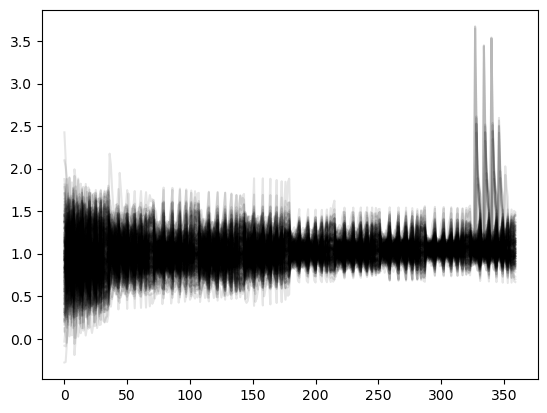

In [30]:
pl.figure()
for ji in range(kp2_all_data.shape[0]):
    pl.plot(kp2_all_data[ji,ind_filter_kp2]/kp2_all_fid[ind_filter_kp2], color='k', alpha=0.1)
pl.show()



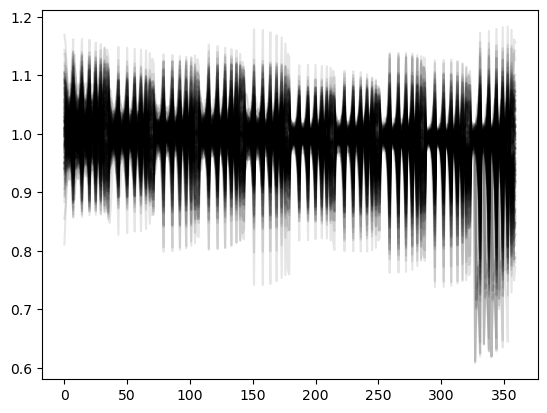

In [31]:
pl.figure()
for ji in range(kp2_all_data_normalised.shape[0]):
    pl.plot((kp2_all_data_normalised[ji,:]/kp2_fid_normalised)[0,:], color='k', alpha=0.1)
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.show()



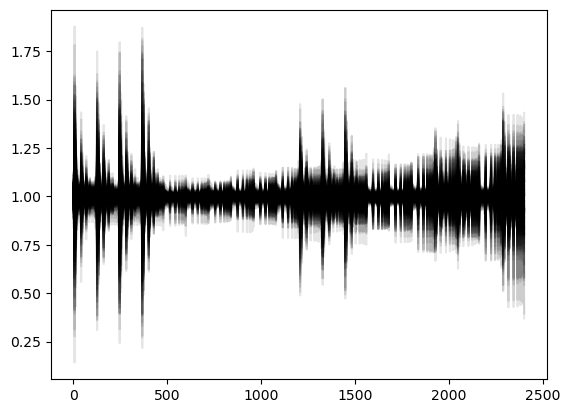

In [44]:
pl.figure()
for ji in range(kp3_all_data_normalised.shape[0]):
    pl.plot((kp3_all_data_normalised[ji,:]/kp3_fid_normalised)[0,:], color='k', alpha=0.1)
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.show()



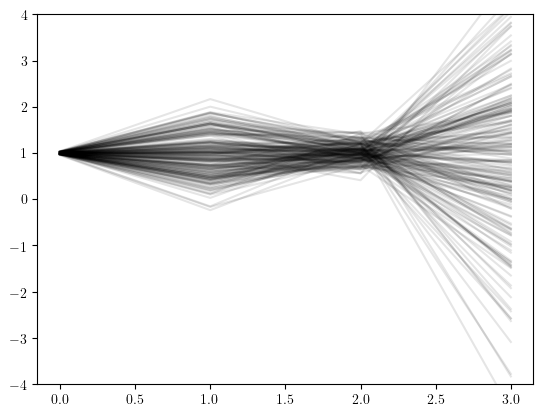

In [82]:
pl.figure()
for ji in range(kp3_all_data_normalised.shape[0]):
    pl.plot((kp3_all_data_normalised_pcaonly[ji,:]/kp3_fid_normalised_pcaonly)[0,:], color='k', alpha=0.1)
    # pl.plot((kp3_all_data_normalised_pcaonly[ji,:]/mean_kp3sims_pca), color='k', alpha=0.1)
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.ylim(-4,4)
pl.show()



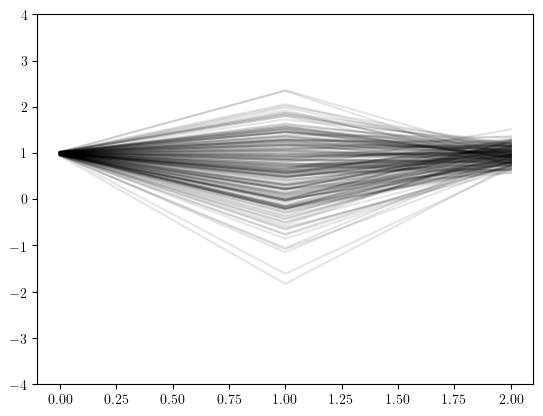

In [83]:
pl.figure()
for ji in range(kp2_all_data_normalised.shape[0]):
    pl.plot((kp2_all_data_normalised_pcaonly[ji,:]/kp2_fid_normalised_pcaonly)[0,:], color='k', alpha=0.1)
    # pl.plot((kp3_all_data_normalised_pcaonly[ji,:]/mean_kp3sims_pca), color='k', alpha=0.1)
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.ylim(-4,4)
pl.show()



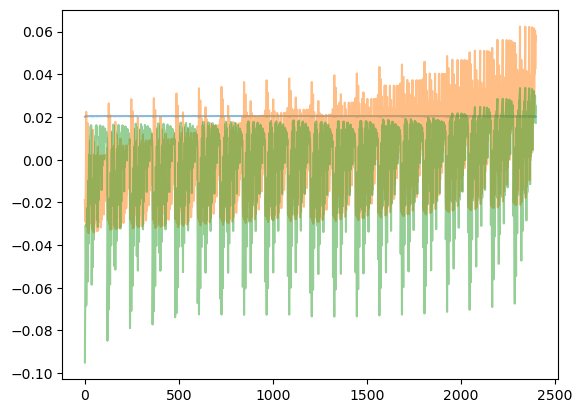

In [33]:
# pca_kp2.components_
pl.figure()
for ji in range(pca_kp2.components_.shape[0]):
    # pl.plot((pca_kp2.components_[ji,:]), color='k', alpha=0.1)
    # pl.plot((pca_kp2.components_[ji,:]), color='k', alpha=0.1)    
    pl.plot((pca_kp3.components_[ji,:]), alpha=0.5)    
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.show()






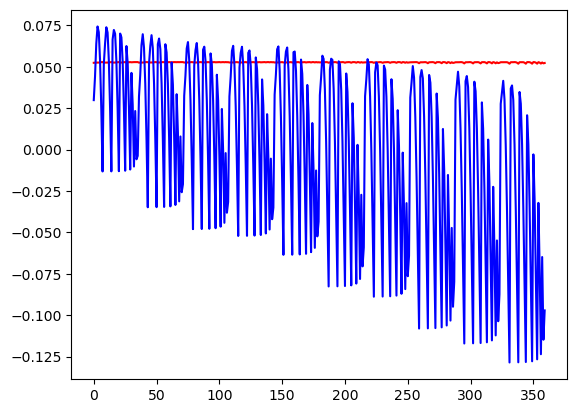

In [34]:
# pca_kp2.components_
import seaborn as sns   

num_lines = 2

ax = pl.subplot(111)
# ax.set_prop_cycle(color=sns.color_palette("coolwarm_r",num_lines))
# pl.figure()
# for ji in range(pca_kp3.components_.shape[0]):
colors = ['r','b','k','orange', 'cyan']
for ji in range(num_lines):    
    ax.plot((pca_kp2.components_[ji,:]),  alpha=1.0, color=colors[ji])
    # pl.plot((pca_kp3.components_[ji,:]), color=colors[ji], alpha=1.0)    
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.show()





In [81]:
# pca_kp3.components_.shape
# pca_kp3.components_[0,:]



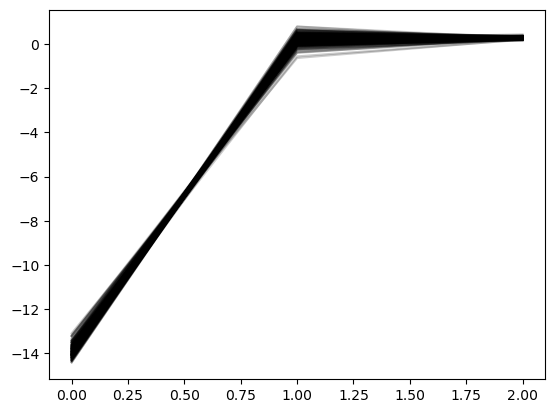

In [36]:
# scaler_kp2_kp3 = StandardScaler().fit(kp2_kp3_all_lhs)
# kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)
pl.figure()
for ji in range(kp2_all_data_normalised_pcaonly.shape[0]):
    pl.plot(kp2_all_data_normalised_pcaonly[ji,:], color='k', alpha=0.2)
pl.show()




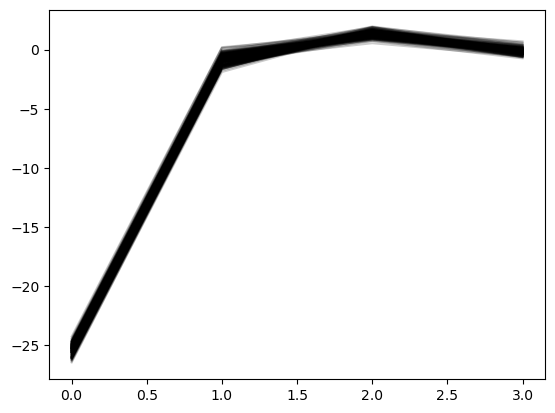

In [37]:
# scaler_kp2_kp3 = StandardScaler().fit(kp2_kp3_all_lhs)
# kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)
pl.figure()
for ji in range(kp3_all_data_normalised_pcaonly.shape[0]):
    pl.plot(kp3_all_data_normalised_pcaonly[ji,:], color='k', alpha=0.2)
pl.show()




In [73]:
# mean_kp2sims_pca
# kp2_all_data_normalised_pcaonly.shape
# mean_kp2sims_pca, kp2_fid_normalised_pcaonly
# mean_kp3sims_pca, kp3_fid_normalised_pcaonly
mean_kp2sims_pca, np.sqrt(np.diag(cov_mat_kp2sims_pca))



(array([-4.40959841,  1.35448876, -0.77313709,  0.32175476,  0.16426545,
         0.01115216,  0.03025774, -0.10675878,  0.01725452,  0.11614741,
         0.0100163 ,  0.01988856,  0.05333137, -0.01869072]),
 array([0.03874591, 0.02813421, 0.00668843, 0.03965256, 0.0169114 ,
        0.01322911, 0.02307066, 0.01564293, 0.01918129, 0.02646783,
        0.00630197, 0.01805718, 0.00725002, 0.0133136 ]))

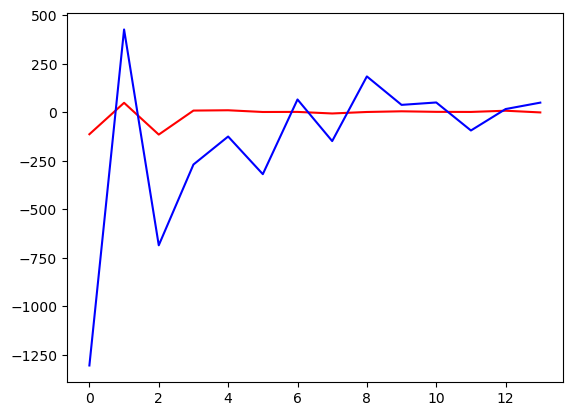

In [74]:
# pl.figure()
# pl.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
# pl.colorbar()
# pl.show()
pl.figure()
pl.plot(mean_kp2sims_pca/(np.sqrt(np.diag(cov_mat_kp2sims_pca))), color='r')
pl.plot(mean_kp3sims_pca/(np.sqrt(np.diag(cov_mat_kp3sims_pca))), color='b')
# pl.colorbar()
pl.show()




In [87]:
# pl.figure()
# pl.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
# pl.colorbar()
# pl.show()
# pl.figure()
# pl.plot(, color='r')
# pl.plot(mean_kp3sims_pca/(np.sqrt(np.diag(cov_mat_kp3sims_pca))), color='b')
# pl.colorbar()
# pl.show()




In [48]:
cov_mat_kp2sims_pca = np.cov(kp2_all_data_normalised.T)
np.sqrt(np.matmul(kp2_fid_normalised,np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), kp2_fid_normalised.T)))




array([[33.69910983]])

In [41]:
np.sqrt(np.matmul(mean_kp2sims_pca,np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), mean_kp2sims_pca.T)))




773.0701688670899

In [42]:
# cov_mat_kp2sims_pca.shape
# mean_kp2sims_pca.shape
# np.linalg.inv(cov_mat_kp2sims_pca)
# np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), mean_kp2sims_pca.T)



In [43]:
np.sqrt(np.matmul(mean_kp3sims_pca,np.matmul(np.linalg.inv(cov_mat_kp3sims_pca), mean_kp3sims_pca.T)))



4189.689813277208

In [78]:
# cov_mat_kp3sims_pca
np.log(np.abs(cov_mat_kp3sims_pca))


array([[-9.4053909 , -6.61190456, -7.26840563, -6.95051637],
       [-6.61190456, -3.65968989, -4.9256515 , -3.58470692],
       [-7.26840563, -4.9256515 , -3.70890601, -4.39265085],
       [-6.95051637, -3.58470692, -4.39265085, -2.80992048]])

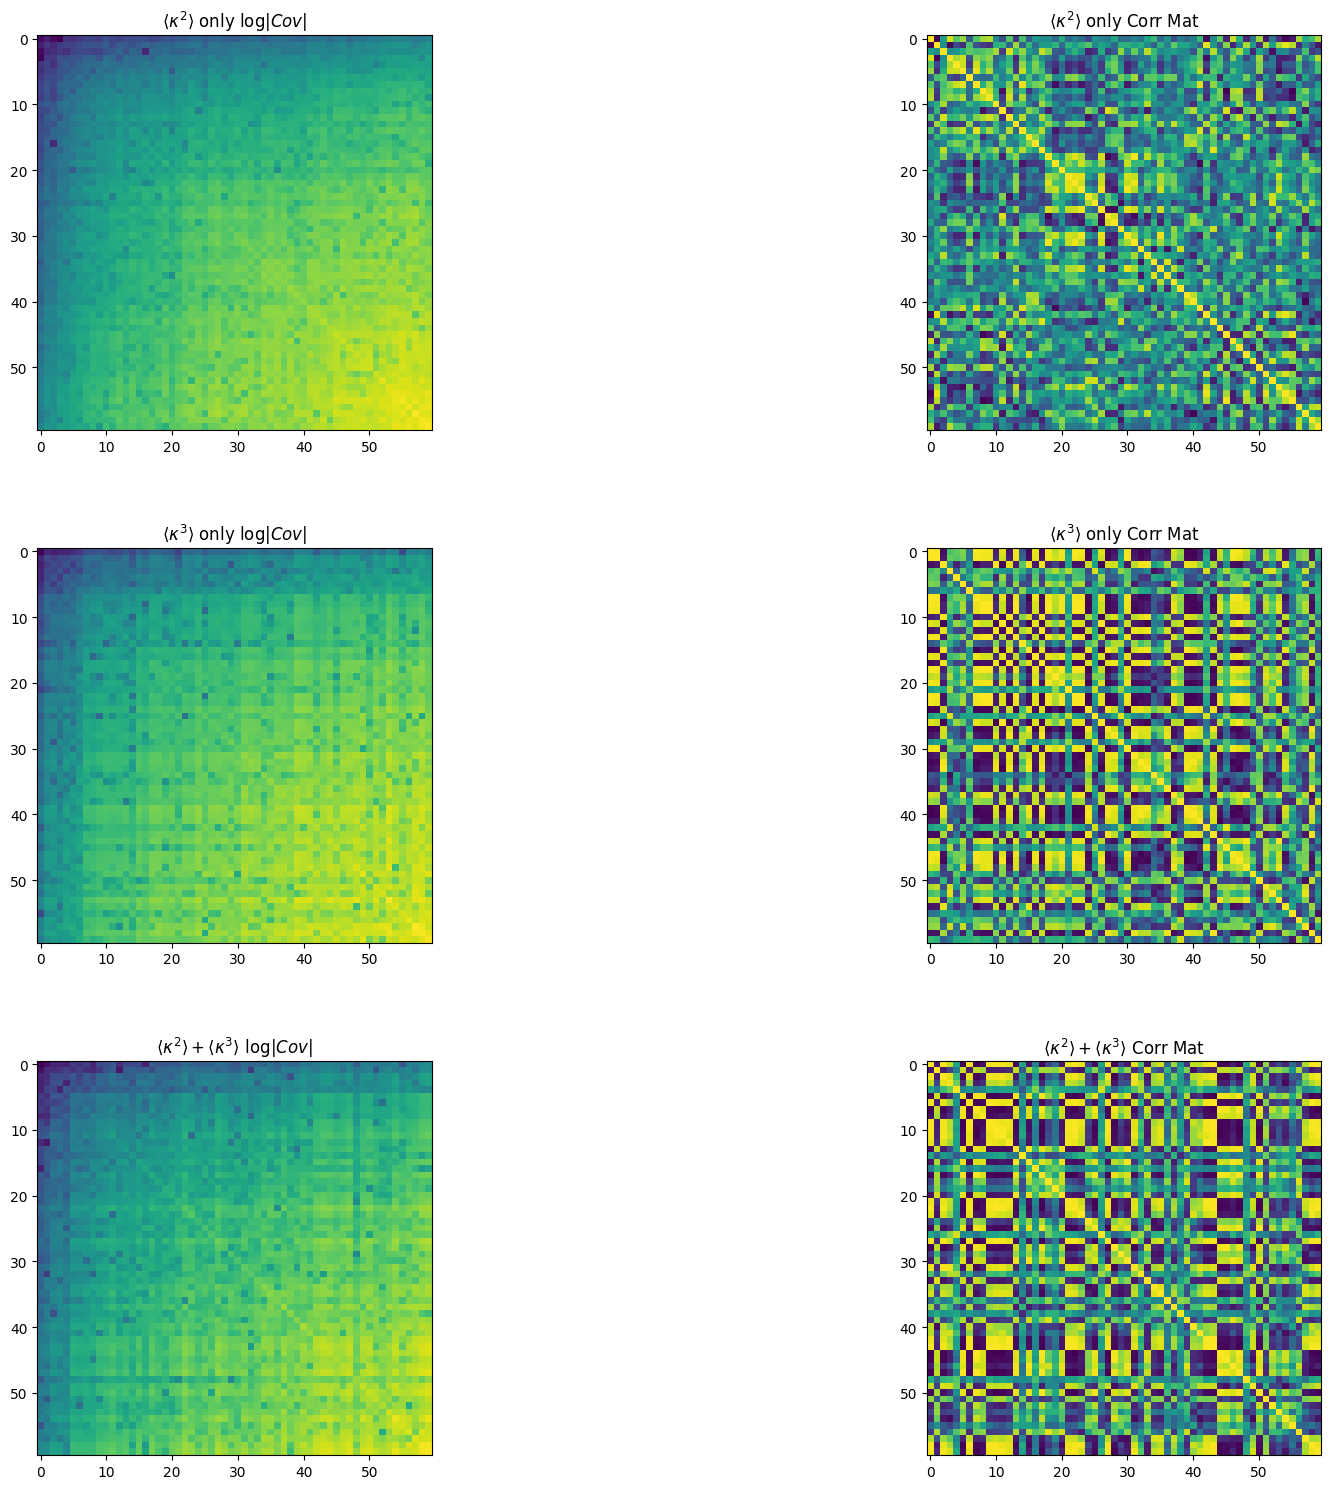

In [321]:
fig, ax_all2 = pl.subplots(3,2,figsize=(18,15))
for jv in range(3):
    ax_all = ax_all2[jv]
    for jp in range(2):
        ax = ax_all[jp]
        if jp == 0:
            if jv == 1:
                ax.imshow(np.log(np.abs(cov_mat_kp3sims_pca)))
                ax.set_title(r'$\langle \kappa^3 \rangle$ only $\log{|Cov|}$')
            if jv == 0:
                ax.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
                ax.set_title(r'$\langle \kappa^2 \rangle$ only $\log{|Cov|}$')
            if jv == 2:
                ax.imshow(np.log(np.abs(cov_mat_kp2kp3sims_pca)))
                ax.set_title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$ $\log{|Cov|}$')
                
                
        if jp == 1:
            if jv == 1:
                ax.imshow((np.corrcoef((cov_mat_kp3sims_pca))))
                ax.set_title(r'$\langle \kappa^3 \rangle$ only Corr Mat')
            if jv == 0:
                ax.imshow((np.corrcoef((cov_mat_kp2sims_pca))))
                ax.set_title(r'$\langle \kappa^2 \rangle$ only Corr Mat')
            if jv == 2:
                ax.imshow((np.corrcoef((cov_mat_kp2kp3sims_pca))))
                ax.set_title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$ Corr Mat')
                
            
fig.tight_layout()
fig.subplots_adjust(hspace=0.3, wspace=0.01)
# fig.savefig('test_cov_corrmat_auto_smbin_gtsc.pdf')
# fig.savefig('test_cov_corrmat_all_gtsc.pdf')
pl.show()
       

    

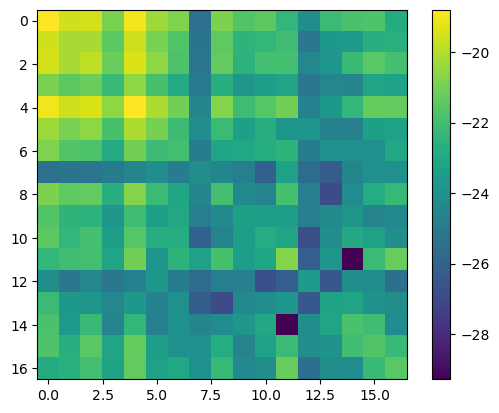

In [52]:
pl.figure()
pl.imshow(np.log(np.abs(cov_mat_kp3sims_pca)))
pl.colorbar()
pl.show()



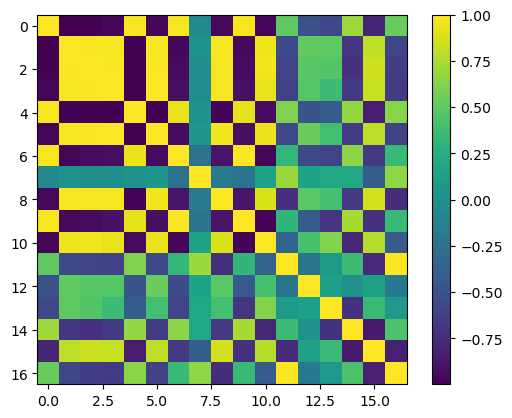

In [53]:
pl.figure()
pl.imshow((np.corrcoef((cov_mat_kp3sims_pca))))
pl.colorbar()
pl.show()



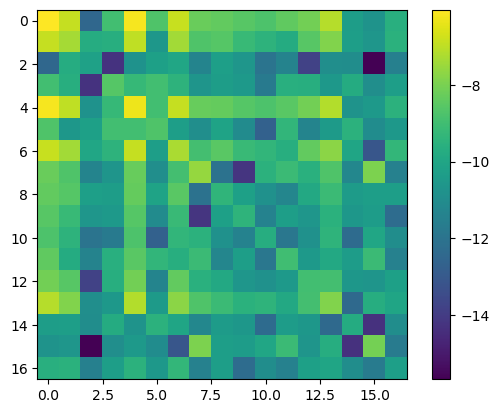

In [54]:
pl.figure()
pl.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
pl.colorbar()
pl.show()



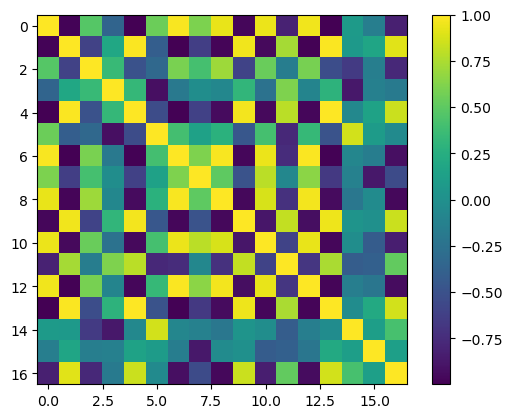

In [55]:
pl.figure()
pl.imshow(np.corrcoef((cov_mat_kp2sims_pca)))
pl.colorbar()
pl.show()



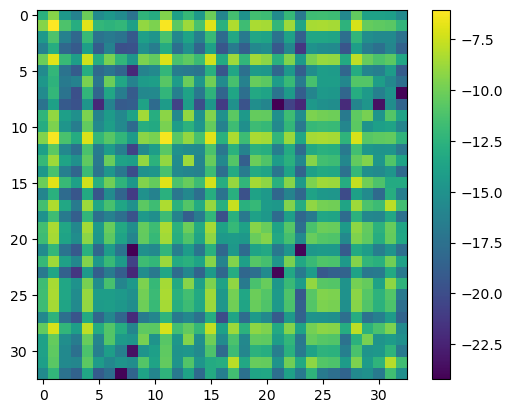

In [56]:
pl.figure()
pl.imshow(np.log(np.abs(cov_mat_kp2kp3sims_pca)))
pl.colorbar()
pl.show()



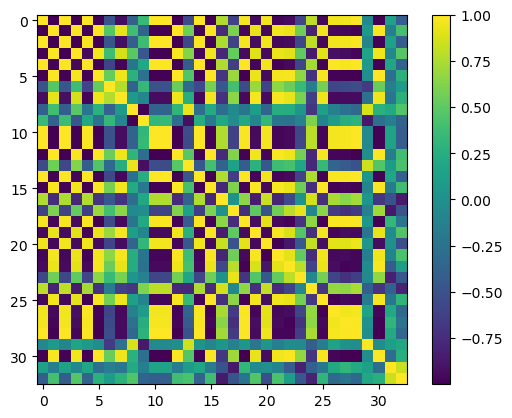

In [57]:
pl.figure()
pl.imshow(np.corrcoef((cov_mat_kp2kp3sims_pca)))
pl.colorbar()
pl.show()



In [ ]:
# '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt'



In [163]:
import matplotlib
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb
import scipy.optimize as op
import scipy.special as spsp
from getdist.paramnames import escapeLatex, makeList, mergeRenames
import matplotlib
matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
import getdist



In [164]:
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8

def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)


def extract_bi(data, names, b1_name = 'bias_lens--b1e_sig8_bin', b2_name = 'bias_lens--b2e_sig8sq_bin', b1_name_out = 'bias_lens--b1e_bin', b2_name_out = 'bias_lens--b2e_bin', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8',bins_fit = [1,2,3,4,5]):
    b1_all = {}
    b2_all = {}
    for ii in range(len(names)):
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    
    for bini in bins_fit:
        for ii in range(len(names)):
            if (names[ii] == b1_name + str(bini)):
                b1_i = data[:,ii]/sigma_8
                b1_all[b1_name_out + str(bini)] = b1_i
            
            if (names[ii] == b2_name + str(bini)):
                b2_i = data[:,ii]/(sigma_8**2)
                b2_all[b2_name_out + str(bini)] = b2_i
    
    return b1_all, b2_all


def get_max_2dpost(g, root, param1='cosmological_parameters--omega_m', param2='cosmological_parameters--s8',param_pair = None):
    param_pair = g.get_param_array(root, param_pair or [param1, param2])
    
    density = g.sample_analyser.get_density_grid(root, param_pair[0], param_pair[1],
                                                                conts=g.settings.num_plot_contours,
                                                                likes=g.settings.shade_meanlikes)
    xyind = np.where(density.P == np.amax(density.P))
    return density.y[xyind[0][0]],density.x[xyind[1][0]]
    
def get_contour_line(sigma_contour,g, density):

    contours = spsp.erf(sigma_contour/np.sqrt(2))
    density.contours = density.getContourLevels([contours])
    contour_levels = density.contours
    fig1, ax1 = pl.subplots(1)
    cs = pl.contour(density.x, density.y, density.P, sorted(contour_levels))
    lines = []
    for line in cs.collections[0].get_paths():
        lines.append(line.vertices)
    pl.close()
    return lines

def get_dmin(line, xref, yref):
    linex = line[0][:,0]
    liney = line[0][:,1]
    d_all = np.sqrt((linex - xref)**2 + (liney - yref)**2)
    dmin = np.amin(d_all)
    return dmin

def lefthand(sigma_contour, g, density, xref, yref): 
    line = get_contour_line(sigma_contour,g, density)
    result = get_dmin(line, xref, yref)  
    return result

lefthand = np.vectorize(lefthand)
   
def diff(sigma_contour, g, density, xref, yref):
    result = lefthand(sigma_contour, g, density, xref, yref)
    return result

def root_find(init_x,g, density, xref, yref): 
    nll = lambda *args: diff(*args)
    args = (g, density, xref, yref)
    result = op.root(nll,np.array([init_x]),args=args,options={'maxfev':50})
    return result

def min_find(init_x,g, density, xref, yref): 
    nll = lambda *args: diff(*args)
    args = (g, density, xref, yref)
    result = op.fmin(nll,np.array([init_x]),args=args)
    return result
 
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))   

def get_frac_angle(start_coord, end_coord,xlims, ylims):
    xmean12 = (0.5*(start_coord[0] + end_coord[0]))
    ymean12 = (0.5*(start_coord[1] + end_coord[1]))
    dx = xlims[1] - xlims[0]
    dy = ylims[1] - ylims[0]
    dxp = xmean12 - end_coord[0]
    dyp = ymean12 - end_coord[1]
    angle_deg = 180.+ np.arctan2((end_coord[1]-start_coord[1])/dy,( end_coord[0]-start_coord[0])/dx)*(180./np.pi)
    return xmean12-dxp/2, ymean12+dyp/3, angle_deg

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)



Removed no burn in
cosmological_parameters--omega_m: 0.2614486674176246, 0.033179429475657635, 0.02365568011685859
COSMOLOGICAL_PARAMETERS--SIGMA_8: 0.8397841352082129, 0.04074510141565457, 0.05175381642998922
cosmological_parameters--s8: 0.7806464873865223, 0.01195963206812578, 0.013187759545754907
Removed no burn in
cosmological_parameters--omega_m: 0.28700424184458656, 0.06728660243550771, 0.030401012668353045
COSMOLOGICAL_PARAMETERS--SIGMA_8: 0.812230973655324, 0.048598916323768115, 0.07411581603044659
cosmological_parameters--s8: 0.7840376854529452, 0.022309494646758132, 0.023267381705019075


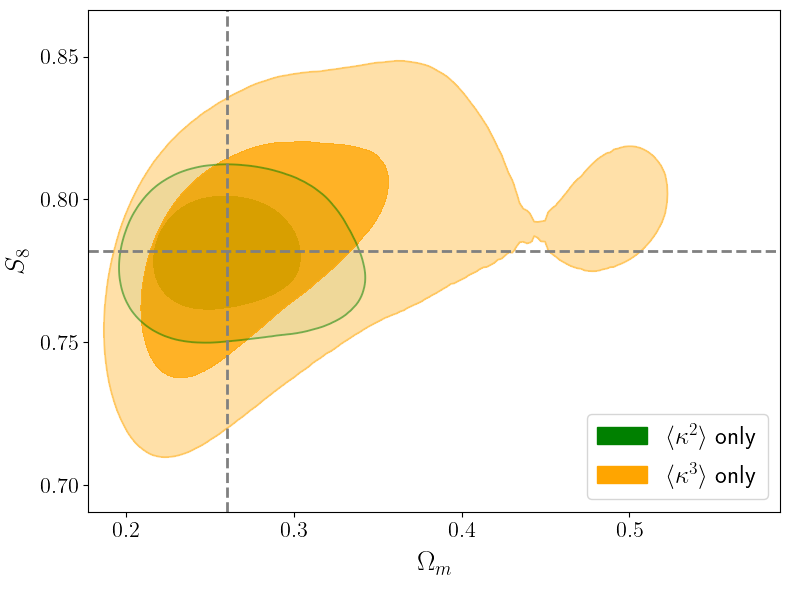

In [167]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)


filename_list = [
    #     '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2_autosm_gtsc.txt',
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt',    

        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',
    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_all_gtsc.txt',  
    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_all_gtsc.txt',        

    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_autosm_gtsc.txt',    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_OmAsonly_all_ncomp60.txt',      
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_OmAsonly_all_ncomp60.txt',        
    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_autosm_all.txt',            
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_all.txt',        
    
    
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2_0321.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias86_lcdm.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias44_lcdm.txt',
]

# legend_labels = [r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$','DES Y1, 2x2pt', 'Planck 2018']
# legend_labels = [r'Auto $\theta$ bins', 'Generalized moments',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']
# legend_labels = ['with scale cuts','All scales',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']
legend_labels = [r'$\langle \kappa^2 \rangle$ only',r'$\langle \kappa^3 \rangle$ only',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']

ext_b1b2 = [0,0,0,0]

all_data = []
all_samples = []

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--s8':r'$S_8$','COSMOLOGICAL_PARAMETERS--SIGMA_8':r'$\sigma_8$'} 
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','COSMOLOGICAL_PARAMETERS--SIGMA_8':r'$\sigma_8$'} 
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--mnu':r'$m_{\nu}$'} 

for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    
    s8 = get_S8(data, param_names).reshape(data.shape[0],1)
    data = np.hstack((data,s8))
    param_names = np.append(param_names,'cosmological_parameters--s8')
        
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)
    marge = samples.getMargeStats()
    for j1 in range(len(param_names)):
        paramj1 = param_names[j1]
        r_marge = marge.parWithName(paramj1)
        r_mean = r_marge.mean
        print(paramj1 + ': ' + str(r_mean) + ', ' + str(r_mean - r_marge.limits[0].lower) + ', ' + str(r_marge.limits[0].upper -  r_mean))
#         Om_err[keyv] = np.array([r_marge.limits[0].lower,r_marge.limits[0].upper])
#         print('Bin ' + str(j1+1) + ': ' + str(r_marge.limits[0].lower) + ', ' + str(r_marge.mean) + ', ' + str(r_marge.limits[0].upper))
    

#     print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
# g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.8235 * (0.3/0.3)**0.5


h0 = 0.69
Onu = 0.00083/(0.69**2)
Om_cb = 0.3 - Onu

# marker_dict = {'cosmological_parameters--omega_m':0.3,'cosmological_parameters--omega_mcb':Om_cb,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.8235,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0, 'cosmological_parameters--omnuh2':0.00083 ,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'}],contour_lws=[1.5],  filled = [False, False,True, False], contour_colors = ['black','blue','red','green'],ls=['-','--','-.'],lims=[0.2,0.52,0.55,0.85])  
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'}],contour_lws=[1.5],  filled = [False, False,True, True, True], contour_colors = ['black','blue','red','green','orange'],ls=['-','--','-.','-','-'],lims=[0.2,0.7,0.57,0.88])  
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'},{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'}],contour_lws=[1.5],  filled = [True, True,False, False,True], contour_colors = ['green','orange','black','blue','red'],ls=['-','-','-','--','-.'])  
g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'},{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'}],contour_lws=[1.5],  filled = [True, True,False, False,True], contour_colors = ['green','orange','black','blue','red'],ls=['-','-','-','--','-.'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
g.add_x_marker(0.26)
g.add_y_marker(0.84*(0.26/0.3)**(0.5))
# g.add_y_marker(0.84)
g.add_legend(legend_labels, legend_loc='lower right',fontsize=18)
# pl.title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$', size=22)
# pl.title(r'$\langle \kappa^3 \rangle$ only', size=22)
pl.show()




Removed no burn in
cosmological_parameters--omega_m: 0.27093803751312967, 0.040444037732903226, 0.030037701297540742
cosmological_parameters--s8: 0.7954960012529269, 0.019888184048834412, 0.019999580682502627
Removed no burn in
cosmological_parameters--omega_m: 0.26755842665112306, 0.044297288833536674, 0.027838766971415074
cosmological_parameters--s8: 0.7998380477202354, 0.02475060686354813, 0.02394765853161407
Removed no burn in
cosmological_parameters--omega_m: 0.310495614637556, 0.10306432129477089, 0.045295824640077254
cosmological_parameters--s8: 0.7462675621238599, 0.22384261977090603, 0.21591206758170978


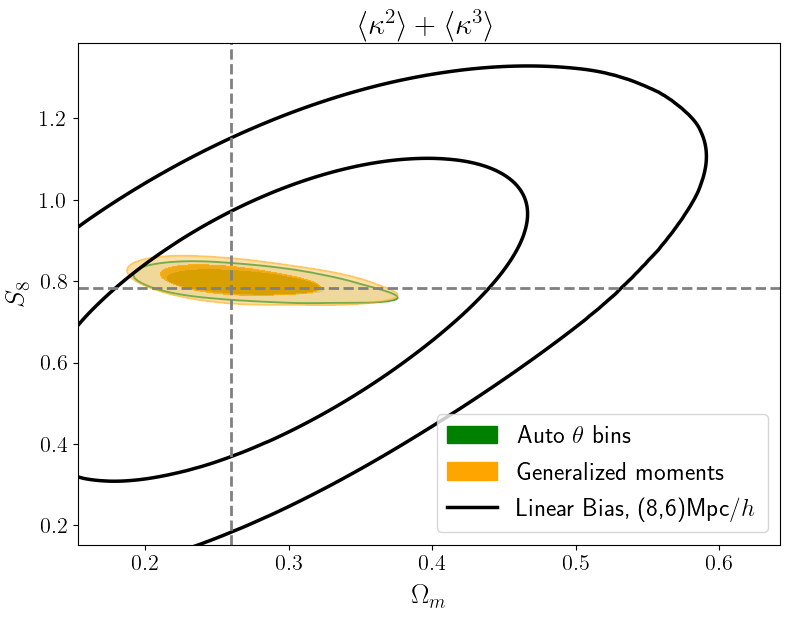

In [111]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)


filename_list = [
    #     '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2_autosm_gtsc.txt',
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt',    

        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',
    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_all_gtsc.txt',  
    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_all_gtsc.txt',        

    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_all_gtsc.txt',        

    
    
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2_0321.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias86_lcdm.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias44_lcdm.txt',
]

# legend_labels = [r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$','DES Y1, 2x2pt', 'Planck 2018']
legend_labels = [r'Auto $\theta$ bins', 'Generalized moments',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']

ext_b1b2 = [0,0,0,0]

all_data = []
all_samples = []

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--s8':r'$S_8$'} 
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--mnu':r'$m_{\nu}$'} 

for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    
    s8 = get_S8(data, param_names).reshape(data.shape[0],1)
    data = np.hstack((data,s8))
    param_names = np.append(param_names,'cosmological_parameters--s8')
        
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)
    marge = samples.getMargeStats()
    for j1 in range(len(param_names)):
        paramj1 = param_names[j1]
        r_marge = marge.parWithName(paramj1)
        r_mean = r_marge.mean
        print(paramj1 + ': ' + str(r_mean) + ', ' + str(r_mean - r_marge.limits[0].lower) + ', ' + str(r_marge.limits[0].upper -  r_mean))
#         Om_err[keyv] = np.array([r_marge.limits[0].lower,r_marge.limits[0].upper])
#         print('Bin ' + str(j1+1) + ': ' + str(r_marge.limits[0].lower) + ', ' + str(r_marge.mean) + ', ' + str(r_marge.limits[0].upper))
    

#     print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
# g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.8235 * (0.3/0.3)**0.5


h0 = 0.69
Onu = 0.00083/(0.69**2)
Om_cb = 0.3 - Onu

# marker_dict = {'cosmological_parameters--omega_m':0.3,'cosmological_parameters--omega_mcb':Om_cb,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.8235,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0, 'cosmological_parameters--omnuh2':0.00083 ,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'}],contour_lws=[1.5],  filled = [False, False,True, False], contour_colors = ['black','blue','red','green'],ls=['-','--','-.'],lims=[0.2,0.52,0.55,0.85])  
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'}],contour_lws=[1.5],  filled = [False, False,True, True, True], contour_colors = ['black','blue','red','green','orange'],ls=['-','--','-.','-','-'],lims=[0.2,0.7,0.57,0.88])  
g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'},{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'}],contour_lws=[1.5],  filled = [True, True,False, False,True], contour_colors = ['green','orange','black','blue','red'],ls=['-','-','-','--','-.'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
g.add_x_marker(0.26)
g.add_y_marker(0.84*(0.26/0.3)**(0.5))
g.add_legend(legend_labels, legend_loc='lower right',fontsize=18)
pl.title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$', size=22)
pl.show()




Removed no burn in
cosmological_parameters--omega_m: 0.27093803751312967, 0.040444037732903226, 0.030037701297540742
cosmological_parameters--mnu: 0.12813284532380606, 0.04094137681769164, 0.04016530860320869
Removed no burn in
cosmological_parameters--omega_m: 0.2622960788406891, 0.03975940271297124, 0.02634344986522491
cosmological_parameters--mnu: 0.12542198834078172, 0.04387505448256085, 0.04137886228902482


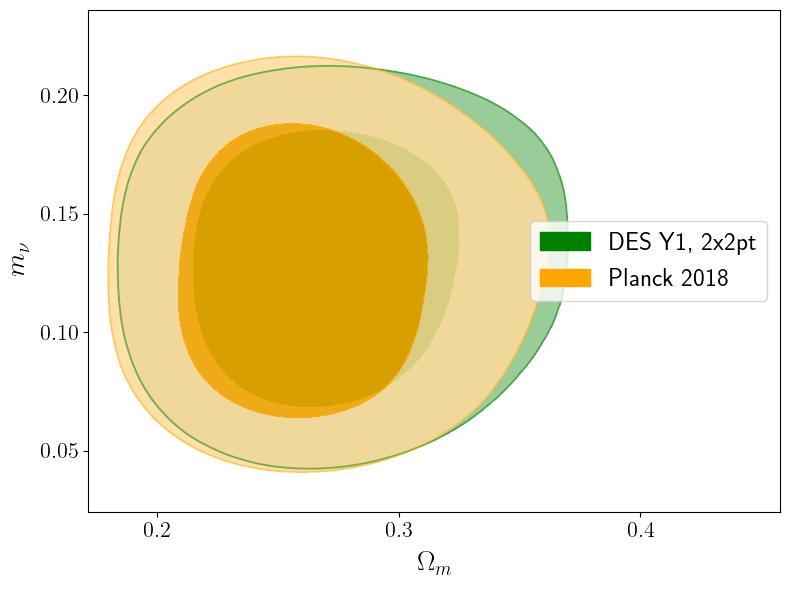

In [100]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)


filename_list = [
        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2_autosm_gtsc.txt',
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt',    

        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_autosm_gtsc.txt',    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_all_gtsc.txt',        
    
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2_0321.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias86_lcdm.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias44_lcdm.txt',
]

# legend_labels = [r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$','DES Y1, 2x2pt', 'Planck 2018']
legend_labels = ['DES Y1, 2x2pt', 'Planck 2018',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']

ext_b1b2 = [0,0,0,0]

all_data = []
all_samples = []

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--s8':r'$S_8$'} 
fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--mnu':r'$m_{\nu}$'} 

for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    
    # s8 = get_S8(data, param_names).reshape(data.shape[0],1)
    # data = np.hstack((data,s8))
    # param_names = np.append(param_names,'cosmological_parameters--s8')
        
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)
    marge = samples.getMargeStats()
    for j1 in range(len(param_names)):
        paramj1 = param_names[j1]
        r_marge = marge.parWithName(paramj1)
        r_mean = r_marge.mean
        print(paramj1 + ': ' + str(r_mean) + ', ' + str(r_mean - r_marge.limits[0].lower) + ', ' + str(r_marge.limits[0].upper -  r_mean))
#         Om_err[keyv] = np.array([r_marge.limits[0].lower,r_marge.limits[0].upper])
#         print('Bin ' + str(j1+1) + ': ' + str(r_marge.limits[0].lower) + ', ' + str(r_marge.mean) + ', ' + str(r_marge.limits[0].upper))
    

#     print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
# g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.8235 * (0.3/0.3)**0.5


h0 = 0.69
Onu = 0.00083/(0.69**2)
Om_cb = 0.3 - Onu

# marker_dict = {'cosmological_parameters--omega_m':0.3,'cosmological_parameters--omega_mcb':Om_cb,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.8235,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0, 'cosmological_parameters--omnuh2':0.00083 ,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'}],contour_lws=[1.5],  filled = [False, False,True, False], contour_colors = ['black','blue','red','green'],ls=['-','--','-.'],lims=[0.2,0.52,0.55,0.85])  
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'}],contour_lws=[1.5],  filled = [False, False,True, True, True], contour_colors = ['black','blue','red','green','orange'],ls=['-','--','-.','-','-'],lims=[0.2,0.7,0.57,0.88])  
g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--mnu', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'},{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'}],contour_lws=[1.5],  filled = [True, True,False, False,True], contour_colors = ['green','orange','black','blue','red'],ls=['-','-','-','--','-.'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
# g.add_x_marker(0.3)
# g.add_y_marker(0.0)
g.add_legend(legend_labels, legend_loc='center right',fontsize=18)
pl.show()

